# Agenda

In this project, we will perform Descriptive Statistical Analysis on a Household Income-Expense dataset. We will:

1. Import and understand the dataset
2. Perform basic descriptive statistics (mean, median, mode, std, var, IQR)
3. Visualize categorical and numerical data
4. Identify insights using group-by and correlation
5. Apply real-world use case: Coefficient of Variation for stock investment comparison


# Import Required Libraries

We use:
- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for visualization
- `scipy.stats` for skewness and kurtosis


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Load and Explore Dataset

This gives a quick preview of the dataset to understand the columns and values.


In [3]:
# Load the CSV file
income_df=pd.read_csv("D:/Assignment Practice/M2/27 May/27 May/26th, 27th  - Intro to Stats, Descriptive Stats/PROJECT/Inc_Exp_Data.csv")
# Display first 5 rows
income_df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# Dataset Overview

`.info()` tells us about column names, data types, and missing values.  
`.shape` gives number of rows and columns.


In [4]:
# Check structure and types
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [5]:
# Check dimensions
income_df.shape

(50, 7)

# Summary Statistics

This provides summary stats like count, mean, std, min, max, and quartiles for numerical columns.


In [6]:
# Basic descriptive statistics
income_df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


# Check for Null Values

To ensure there are no missing values before performing analysis.


In [7]:
income_df.isnull().sum()

Mthly_HH_Income             0
Mthly_HH_Expense            0
No_of_Fly_Members           0
Emi_or_Rent_Amt             0
Annual_HH_Income            0
Highest_Qualified_Member    0
No_of_Earning_Members       0
dtype: int64

# Measures of Central Tendency

Mean shows average, median shows middle value, and mode shows the most frequent value.


## Mean of Monthly Household Expense

In [9]:
mean_expense = income_df["Mthly_HH_Expense"].mean()
print(f"Mean Monthly Household Expense: {mean_expense:,.2f}")

Mean Monthly Household Expense: 18,818.00


## Median of Monthly Household Expense

In [10]:
median_expense = income_df["Mthly_HH_Expense"].median()
print(f"Median Monthly Household Expense: {median_expense}")

Median Monthly Household Expense: 15500.0


# Mode (most frequent expense)

In [11]:
mode_expense = income_df["Mthly_HH_Expense"].mode()[0]
print(f"Most Frequent Monthly Expense: {mode_expense}")

Most Frequent Monthly Expense: 25000


# Most Common Expense Value

In [12]:
most_common = income_df["Mthly_HH_Expense"].value_counts().idxmax()
print(f"The most common expense is: {most_common}")

The most common expense is: 25000


# Visualize Categorical Variable
## Highest Qualified Member

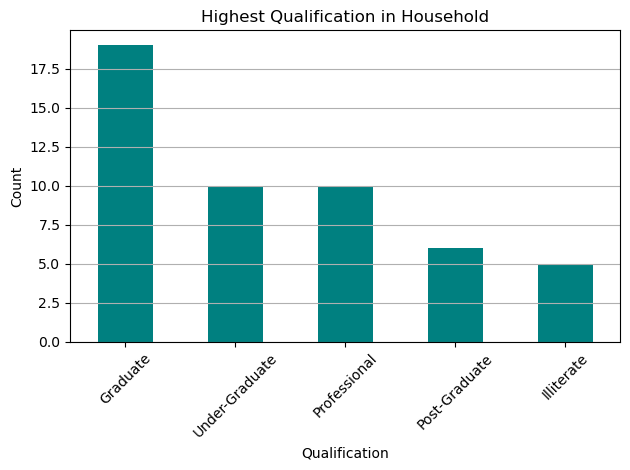

In [13]:
income_df["Highest_Qualified_Member"].value_counts().plot(kind="bar", color='teal')
plt.title("Highest Qualification in Household")
plt.xlabel("Qualification")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Interquartile Range (IQR)

IQR helps us understand the spread of middle 50% data and detect outliers.

In [24]:
Q1 = income_df["Mthly_HH_Expense"].quantile(0.25)
Q3 = income_df["Mthly_HH_Expense"].quantile(0.75)
IQR = Q3 - Q1
print("Q1 :",Q1)
print("Q3 :",Q3)
print(f"IQR for Monthly Household Expense: {IQR}")

Q1 : 10000.0
Q3 : 25000.0
IQR for Monthly Household Expense: 15000.0


# Boxplot for Outliers

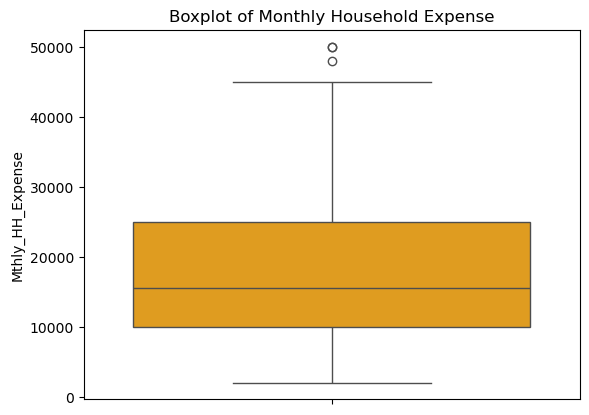

In [15]:
sns.boxplot(y=income_df["Mthly_HH_Expense"], color='orange')
plt.title("Boxplot of Monthly Household Expense")
plt.show()

# Standard Deviation and Variance

In [16]:
# Std Dev for first 4 numeric columns
std_df = income_df.iloc[:, 0:4].std()
print("Standard Deviation:\n", std_df)

Standard Deviation:
 Mthly_HH_Income      26097.908979
Mthly_HH_Expense     12090.216824
No_of_Fly_Members        1.517382
Emi_or_Rent_Amt       6241.434948
dtype: float64


In [23]:
# Variance for first 4 numeric columns
var_df = income_df.iloc[:, 0:4].var()
print("\nVariance:\n",var_df )


Variance:
 Mthly_HH_Income      6.811009e+08
Mthly_HH_Expense     1.461733e+08
No_of_Fly_Members    2.302449e+00
Emi_or_Rent_Amt      3.895551e+07
dtype: float64


# Correlation Matrix

This shows how strongly variables are related.  
e.g., income and expense might have a positive correlation.

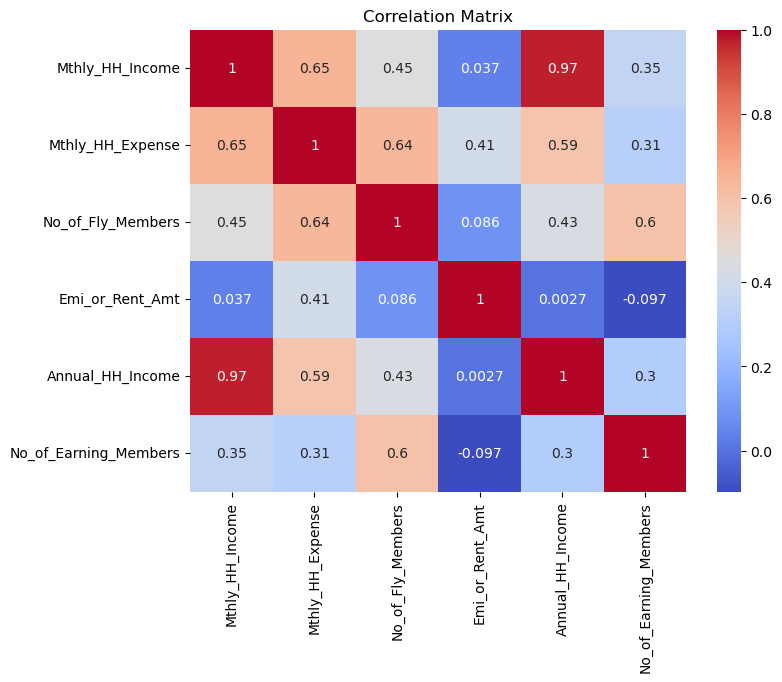

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(income_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Group Analysis – Qualification vs Income

Group-by helps analyze how income varies with education level.

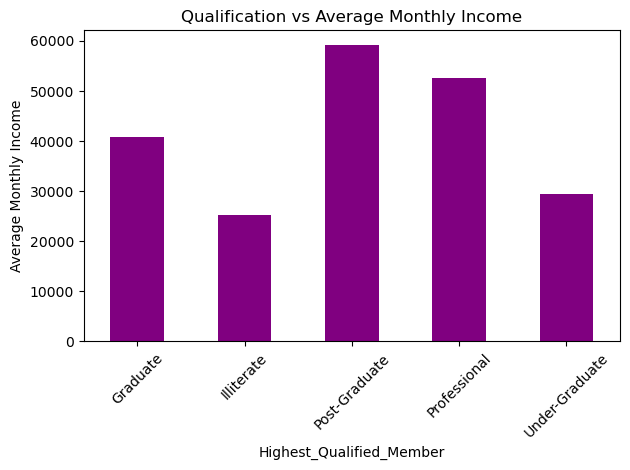

In [20]:
income_df.groupby("Highest_Qualified_Member")["Mthly_HH_Income"].mean().plot(kind="bar", color='purple')
plt.ylabel("Average Monthly Income")
plt.title("Qualification vs Average Monthly Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Skewness and Kurtosis

- Skewness tells if data is symmetric (0 = perfect)
- Kurtosis tells if data has heavy/light tails compared to normal distribution

In [21]:
print("Skewness of Monthly Expense:", skew(income_df["Mthly_HH_Expense"]))
print("Kurtosis of Monthly Expense:", kurtosis(income_df["Mthly_HH_Expense"]))

Skewness of Monthly Expense: 1.1631728469608633
Kurtosis of Monthly Expense: 0.7331960636897663


# Coefficient of Variation (Real-life stock example)

Lower Coefficient of Variation (CV) is better.  
Stock B is more stable (CV = 0.5) than Stock A (CV = 0.67), so it's a better investment.

In [22]:
# Coefficient of variation = std / mean
std_A, mean_A = 10, 15
std_B, mean_B = 5, 10

cv_A = std_A / mean_A
cv_B = std_B / mean_B

print(f"Stock A CV: {cv_A:.2f}")
print(f"Stock B CV: {cv_B:.2f}")


Stock A CV: 0.67
Stock B CV: 0.50


# Conclusion:

- The average monthly household expense is around 18,818.
- Most households have 1 earning member and qualification affects income.
- Monthly expenses are slightly skewed and have visible outliers.
- Stock B is less risky and more efficient based on CV.

This analysis used core descriptive statistics techniques, suitable for understanding household patterns and making informed decisions.